<center>
    <img src="https://i.ibb.co.com/m5hwhf2/HDC-Anca.png" width="300">
    <h1><b>Loan Risk Assesment - by Heptad Data Collector</b></h1>
</center>

**Members of Heptad Data Collector**

1. Farah Fitria Sari
2. Aditya Fajri Melinianto
3. Apri Ansyah
5. Oktafina Pingkan Purwanto
6. Pancaran Ratna Mustika
7. Ryan Fajar
8. Tiara Lailatul Nikmah

- **Tools**

![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)
![Featuring](https://img.shields.io/badge/Using-Python-blue?style=for-the-badge&logo=python)

- **Dataset**

Large and rich dataset from the U.S. Small Business Administration (SBA): [Should This Loan be Approved or Denied?](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied "Should This Loan be Approved or Denied?")

# Business Understanding

## Latar Belakang

<center>
    <img src="https://www.sba.gov/themes/custom/sba/dist/img/social/SBASEOImage.jpg" width="700">
</center>

U.S. Small Business Administration (SBA) didirikan pada tahun 1953, dengan tujuan untuk mendukung usaha kecil di pasar kredit Amerika dalam ``mengurangi pengangguran dan menciptakan lapangan kerja``. Salah satu cara SBA membantu usaha kecil adalah ``melalui program jaminan pinjaman untuk mendorong bank memberikan kredit kepada usaha kecil``. Jika peminjam gagal bayar, maka SBA akan menanggung sebagian dari pinjaman. Meskipun SBA bertindak untuk mengurangi resiko bank dengan cara membayar sebagian jumlah kerugian bank sesuai dengan yang telah dijaminkan diawal, kejadian gagal bayar (loan default) menimbulkan pertanyaan tentang efektivitas inisiatif tersebut dan dampaknya terhadap stabilitas keuangan bank dan ekonomi.


## Problem Statement

SBA sebagai lembaga penjamin untuk bank bagi para UMKM ingin ``menurunkan loan default rate`` dari usaha-usaha yang mereka loloskan / jaminkan.
    

## Roles

Sebagai sekelompok tim data scientist, tim Heptad Data Collector diminta untuk melakukan analisa dan membuat model yang bisa memprediksi apakah pinjaman ini bisa diterima/tidak berdasarkan dataset yang dimiliki oleh perusahaan Small Business Administration Amerika Serikat (SBA).

Selain itu, tim Heptad Data Collector juga diminta untuk mempresentasikan solusi mereka terhadap client, yaitu SBA itu sendiri. Solusi tersebut bisa berupa rekomendasi bisnis, dampak bisnis (business impact), atau simulasi bisnis (business simulation):

* PIC Data Cleansing: ``Tiara Lailatul Nikmah``
* PIC Feature Engineering: ``Ryan Fajar``
* PIC Data Exploration: ``Oktafina Pingkan Purwanto``
* PIC EDA: ``Apri Ansyah``
* PIC Insights and Visualization: ``Farah Fitria Sari``
* PIC Modelling and Evaluation: ``Aditya Fajri Melinianto``

## Goals

Mengembangkan data driven decision making system yang ``robust``, memanfaatkan data demografis perusahaan untuk menilai ``kelayakan pinjaman`` UMKM dengan akurat.


## Objectives
1. Data preprocessing & cleansing
2. Identifikasi potensi resiko dengan EDA, dengan visualisasi
3. Membuat model machine learning
4. Menentukan metrics evaluation yang tepat
5. Monitoring & reporting (mentranslate hasil pemodelan dan evaluasi ke dalam ranah bisnis).

## Business Metrics
<img src="https://i.ibb.co.com/pXXGy6X/2024-05-16-18-23-14-Stage-0-PT-Heptad-Data-Collector-Kelompok-4-DS-Batch-43-pptx-Google-Slide.png">

# **Stage 1 Data Pre-Processing**

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [17]:
source = 'SBAnational.csv'
df = pd.read_csv(source)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## Data Understanding

In [18]:
print("Dimensi data :", df.shape)
print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])

Dimensi data : (10385, 27)
Jumlah baris : 10385
Jumlah kolom : 27


In [19]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [20]:
# basic info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10385 entries, 0 to 10384
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LoanNr_ChkDgt      10385 non-null  int64 
 1   Name               10381 non-null  object
 2   City               10385 non-null  object
 3   State              10385 non-null  object
 4   Zip                10385 non-null  int64 
 5   Bank               10379 non-null  object
 6   BankState          10379 non-null  object
 7   NAICS              10385 non-null  int64 
 8   ApprovalDate       10385 non-null  object
 9   ApprovalFY         10385 non-null  int64 
 10  Term               10385 non-null  int64 
 11  NoEmp              10385 non-null  int64 
 12  NewExist           10385 non-null  int64 
 13  CreateJob          10385 non-null  int64 
 14  RetainedJob        10385 non-null  int64 
 15  FranchiseCode      10385 non-null  int64 
 16  UrbanRural         10385 non-null  int64

Dari info diatas, bisa didapatkan informasi sebagai berikut

* Dataset memiliki 27 columns dan 899164 rows data
* Terdapat 3 jenis tipe data yaitu : int64, object, float64
* Cukup banyak kolom yang memiliki missing values, terutama pada ChgOffDate

Pertimbangan pada saat data pre-processing

* Menghapus kolom ChgOffDate karena terlalu banyak missing value
* Menggunakan metode imputation untuk menangani missing value yang lain

## A. Handling Missing Value

In [21]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

LoanNr_ChkDgt           0
Name                    4
City                    0
State                   0
Zip                     0
Bank                    6
BankState               6
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               1
LowDoc                  0
ChgOffDate           8366
DisbursementDate       17
DisbursementGross       1
BalanceGross            1
MIS_Status             23
ChgOffPrinGr            1
GrAppv                  1
SBA_Appv                1
dtype: int64

In [22]:
print('Missing values status:', df.isnull().values.any())
missing_percentage = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_percentage['Percentage'] = (missing_percentage['Total Null Values']/df.shape[0])*100
missing_percentage["Data Type"] = [df[col].dtype for col in df.columns]
missing_percentage.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
missing_percentage.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
ChgOffDate,8366,80.558498,object
MIS_Status,23,0.221473,object
DisbursementDate,17,0.163698,object
Bank,6,0.057776,object
BankState,6,0.057776,object
Name,4,0.038517,object
ChgOffPrinGr,1,0.009629,int64
BalanceGross,1,0.009629,int64
DisbursementGross,1,0.009629,object
SBA_Appv,1,0.009629,object


- Kolom ChargeOffDate, ``Missing Value lebih dari 80%`` maka kolom dihapus

In [23]:
# Menghapus kolom ChgoffDate karena terlalu banyak missing value
df = df.drop(['ChgOffDate'], axis=1)

- Menghapus baris data jika terdapat missing value pada kolom ``target yaitu MIS_Status``
- Setelah itu, untuk kolom lain yang memiliki NaN seperti kolom ``Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, DisbursementDate,`` Missing Value hanya dibawah 0,5%, maka hanya dihapus baris yang mengandung NaN

In [24]:
# Menghapus baris jika terdapat missing value pada kolom MIS_Status
df.dropna(subset=['MIS_Status'], inplace=True)

In [25]:
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate'], inplace=True)

## B. Handle duplicate data

In [26]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [27]:
df.duplicated().value_counts()

False    10342
Name: count, dtype: int64

Dari info diatas, bisa didapatkan informasi sebagai berikut
* **Tidak ada data yang duplikat**

## C. Feature Transformation

1. Mengubah kolom ``object`` ke ``numerik`` (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float
2. Menghilangkan ``nilai 0`` pada: NAICS (memasukan ke kategori 81), Term & NoEmp (diganti dengan nilai median), NewExist & UrbanRural (diganti dengan nilai modus)
3. Menghilangkan nilai ``bukan Y atau N`` pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus (N))
4. Menghilangkan ``3 karakter terakhir`` pada kolom NAICS
5. Mengganti ``0 dan 1`` pada kolom FranchiseCode menjadi ``Not-Franchise`` dan selain itu menjadi ``Franchise``
6. Mengganti Nilai ``1976A`` pada kolom ApprovalFY diganti menjadi ``1976``
7. NoEmp, CreateJob, RetainedJob ``dilakukan robust-scaler``, untuk mempermudah dalam melakukan analisis statistik
8. Untuk Bank dengan ``count < 1500`` akan dimasukkan ke kategori ‘Others’


### 1. Mengubah kolom object ke numerik (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float

- Karena kolom tersebut termasuk ``nominal angka``, maka akan dirubah terlebih dahulu ke tipe data ``float``
- Akan tetapi, nantinya fitur ini tidak akan digunakan karena tidak relevan untuk dijadikan prediktor

In [29]:
#Merubah Kolom Currency menjadi float
curr_col = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[curr_col] = df[curr_col].replace('[\$,]', '', regex=True).astype(float)

### 2a. Menghilangkan nilai 0 pada: NAICS (memasukan ke kategori 81)

- NAICS merepresentasikan industri peminjam, disini akan memasukan industri yang memiliki nilai 0 yang ada pada dataset ke sektor others, yaitu kategori 81

In [28]:
df['NAICS'].value_counts()

NAICS
0         2006
722110     205
811111     194
561730     166
722211     159
          ... 
531130       1
322222       1
333414       1
551112       1
611630       1
Name: count, Length: 812, dtype: int64

In [30]:
df['NAICS'] = df['NAICS'].replace({0: 81})
df.NAICS.value_counts()

NAICS
81        2006
722110     205
811111     194
561730     166
722211     159
          ... 
531130       1
322222       1
333414       1
551112       1
611630       1
Name: count, Length: 812, dtype: int64

### 2b. Menghilangkan nilai 0 pada Term & NoEmp (diganti dengan nilai median)

- Term 0 akan di replace dengan median, karena angsuran tidak mungkin bernilai 0
- Sama halnya dengan NoEmp, nilai yang bernilai 0 akan diisi dengan nilai median

In [31]:
df['Term'] = df['Term'].replace({0: df['Term'].median()})
df.Term.value_counts()

Term
84     3872
60     1245
120     529
240     508
36      422
       ... 
223       1
280       1
299       1
190       1
189       1
Name: count, Length: 251, dtype: int64

In [32]:
df['NoEmp'] = df['NoEmp'].replace({0: df['NoEmp'].median()})
df.NoEmp.value_counts()

NoEmp
1       2116
2       1883
3       1201
4        897
5        723
        ... 
263        1
7941       1
82         1
210        1
74         1
Name: count, Length: 117, dtype: int64

### 2c. Menghilangkan nilai 0 pada NewExist & UrbanRural (diganti dengan nilai modus)

- Nilai 0 pada kolom NewExist akan digantikan dengan modus karena termasuk categorical feature

In [33]:
df['NewExist'].mode()

0    1
Name: NewExist, dtype: int64

In [34]:
df['NewExist'] = df['NewExist'].replace({0: 1})
df['NewExist'] = df['NewExist'].astype(int)
df.NewExist.value_counts()

NewExist
1    7091
2    3251
Name: count, dtype: int64

- Nilai 0 pada kolom UrbanRural juga akan digantikan dengan modus karena termasuk categorical feature

In [35]:
df['UrbanRural'].mode()

0    1
Name: UrbanRural, dtype: int64

In [36]:
df['UrbanRural'] = df['UrbanRural'].replace({0: 1})
df['UrbanRural'] = df['UrbanRural'].astype('int')
df.UrbanRural.value_counts()

UrbanRural
1    8803
2    1539
Name: count, dtype: int64

### 3. Menghilangkan nilai bukan Y atau N pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus)

In [37]:
df['LowDoc'] = np.where((df['LowDoc'] != 'N') & (df['LowDoc'] != 'Y'), 'N', df.LowDoc)
df.LowDoc.value_counts()

LowDoc
N    9350
Y     992
Name: count, dtype: int64

In [38]:
df['LowDoc'] = df.apply(lambda row: 1 if row['LowDoc'] == 'Y' else 0, axis=1)

In [39]:
df['RevLineCr'] = np.where((df['RevLineCr'] != 'N') & (df['RevLineCr'] != 'Y'), 'N', df.RevLineCr)
df.RevLineCr.value_counts()

RevLineCr
N    6660
Y    3682
Name: count, dtype: int64

In [40]:
df['RevLineCr'] = df.apply(lambda row: 1 if row['RevLineCr'] == 'Y' else 0, axis=1)

### 4. Menghilangkan 3 karakter terakhir pada kolom NAICS

In [41]:
# Menangani kolom NAICS, kita akan meerubahnya menjadi nama sektornya dan membuat kolom rate default setiap sektornya
# Berdasarkan guideline, dua  digit di awal adalah kode industrinya

ind_code = df['NAICS']

#Fungsi untuk mengambil ambil 2 digit awal dari kodenya
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

In [42]:
# Membuat kolom baru yaitu ind_code
df['ind_code'] = df.NAICS.apply(get_code)

In [43]:
df['ind_code'].value_counts()

ind_code
81    2844
54     970
44     962
23     769
42     639
62     601
45     586
56     561
72     532
33     434
48     234
32     201
51     184
53     181
71     170
31     135
52     131
61      86
11      54
49      32
21      16
22      10
92       9
55       1
Name: count, dtype: int64

### 5. Mengganti 0 dan 1 pada kolom FranchiseCode menjadi Not-Franchise dan selain itu menjadi Franchise

In [ ]:
df.FranchiseCode.value_counts()

FranchiseCode
1        9765
0         123
78760      25
50564      16
68020      14
         ... 
20728       1
70130       1
88660       1
37000       1
60590       1
Name: count, Length: 255, dtype: int64

In [ ]:
# Melihat kolom FranchiseCode, berdasarkan guideline
# Jika kolom FranchiseCode = 0 atau = 1 maka dia tidak ada frnachise, selain itu maka dia ada franchise

df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ) & (df.FranchiseCode != 1 ),'Franchise','Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('0.0', 'Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('1.0', 'Not-Franchise')
df.FranchiseCode.value_counts()

FranchiseCode
Not-Franchise    835037
Franchise         51203
Name: count, dtype: int64

In [ ]:
df['FranchiseCode'] = df.apply(lambda row: 1 if row['FranchiseCode'] == 'Franchise' else 0, axis=1)

### 6. Mengganti Nilai 1976A pada kolom ApprovalFY diganti menjadi 1976

In [ ]:
#Merubah kolom ApprovalFY menjadi integer, walaupun sebenrnya dia adalah tahun, tapi agar lebih mudah
df['ApprovalFY'].replace('1976A', 1976, inplace=True)
df['ApprovalFY']= df['ApprovalFY'].astype(int)

### 7. NoEmp, CreateJob, RetainedJob dilakukan robust-scaler, untuk mempermudah dalam melakukan analisis statistik

In [ ]:
scaler = RobustScaler()
column_to_scale = ['NoEmp', 'CreateJob', 'RetainedJob']

In [ ]:
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

Hasil Output dari robust scaler adalah sebagai berikut, mengkonversi rentang nilai dari kolom yang sudah ditentukan diatas

In [ ]:
df[column_to_scale].describe()

,NoEmp,CreateJob,RetainedJob
count,886240.000000,886240.000000,886240.000000
mean,0.931244,8.463092,2.460602
std,9.273034,237.301746,59.434887
min,-0.375000,0.000000,-0.250000
25%,-0.250000,0.000000,-0.250000
50%,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.750000
max,1249.375000,8800.000000,2374.750000


### 8. Untuk Bank dengan count < 1500 akan dimasukkan ke kategori ‘Others’

Membuat variabel baru yang mengandung jumlah masing-masing kemunculan bank

In [ ]:
bank_counts = df['Bank'].value_counts()

In [ ]:
bank_counts

Bank
BANK OF AMERICA NATL ASSOC        86075
WELLS FARGO BANK NATL ASSOC       62934
JPMORGAN CHASE BANK NATL ASSOC    47460
U.S. BANK NATIONAL ASSOCIATION    34752
CITIZENS BANK NATL ASSOC          33569
                                  ...  
AMER BK & TR WISCONSIN                1
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
DEPCO                                 1
Name: count, Length: 5788, dtype: int64

Membuat variabel baru lagi untuk mengelompokkan bank yang hanya muncul kurang dari 1500x saja

In [ ]:
banks_to_replace = bank_counts[bank_counts < 1500].index

In [ ]:
df['Bank'] = df['Bank'].apply(lambda x: 'Others' if x in banks_to_replace else x)

Hasil setelah pengelompokkan bank

In [ ]:
df['Bank'].value_counts()

Bank
Others                            317633
BANK OF AMERICA NATL ASSOC         86075
WELLS FARGO BANK NATL ASSOC        62934
JPMORGAN CHASE BANK NATL ASSOC     47460
U.S. BANK NATIONAL ASSOCIATION     34752
CITIZENS BANK NATL ASSOC           33569
PNC BANK, NATIONAL ASSOCIATION     27148
BBCN BANK                          22814
CAPITAL ONE NATL ASSOC             22220
MANUFACTURERS & TRADERS TR CO      11150
READYCAP LENDING, LLC              10616
THE HUNTINGTON NATIONAL BANK        9520
KEYBANK NATIONAL ASSOCIATION        9186
TD BANK, NATIONAL ASSOCIATION       8901
BRANCH BK. & TR CO                  8028
ZIONS FIRST NATIONAL BANK           7897
CALIFORNIA BANK & TRUST             7476
CITIBANK, N.A.                      7402
REGIONS BANK                        7143
BANCO POPULAR NORTH AMERICA         7135
COMERICA BANK                       6991
BANK OF THE WEST                    6628
COMPASS BANK                        6384
BUSINESS LOAN CENTER, LLC           6262
GE CAP. SMA

## D. Feature Encoding

1. NAICS diubah menjadi ``nama-nama industri`` setiap kategori, setelah itu akan dilakukan ``label encoding``
2. MIS_status akan dilakukan label encoding ``ChargeOff = 1``, ``PIF=0``
3. Melakukan label encoding terhadap kolom bank dengan frekuensi kemunculan 60 teratas


### 1. NAICS diubah menjadi nama-nama industri setiap kategori, setelah itu akan dilakukan label encoding

In [ ]:
#Merubah 2 digit menjadi nama sektor
def industri(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance',
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise',
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]

In [ ]:
df['Industri'] = df.ind_code.apply(industri)
df['Industri'].value_counts()

Industri
Other Servieces (Ex: Public Administration)                        270021
Retail Trade                                                       125762
Manufacturing                                                       67109
Accomodation & Food Service                                         67084
Professional, Scientific & Technical Service                        66951
Constuction                                                         65635
Health Care & Social Assistance                                     54633
Wholesale Trade                                                     48148
Administrative, Support, Waste Management & Remediation Service     32114
Transportation & Warehousing                                        22135
Arts, Entertainment & Recreation                                    14460
Real Estate, Rental & Leasing                                       13457
Information                                                         11220
Finance & Insurance          

Setelah dikelompokan dengan masinng-masing industrinya, maka selanjutnya akan dilakukan label encoding

In [ ]:
# Melakukan label encoding
label_encode = ['Industri']
label_encoder = LabelEncoder()
df[label_encode] =df[label_encode].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Industri'].value_counts()

Industri
12    270021
16    125762
10     67109
0      67084
13     66951
4      65635
7      54633
19     48148
1      32114
17     22135
3      14460
15     13457
8      11220
6       9378
2       8868
5       6313
11      1820
18       654
9        256
14       222
Name: count, dtype: int64

### 2. Melakukan label encoding terhadap MIS_status dengan ketentuan ChargeOff = 1 dan PIF=0

In [ ]:
# Merubah input MIS_Status dari string menjadi integer

df['MIS_Status'] = df['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1}).astype(int)
df.MIS_Status.value_counts()

MIS_Status
0    730199
1    156041
Name: count, dtype: int64

### 3. Melakukan label encoding terhadap kolom bank dengan frekuensi kemunculan 60 teratas

In [ ]:
label_encode_bank = ['Bank']
label_encoder = LabelEncoder()
df[label_encode_bank] =df[label_encode_bank].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Bank'].value_counts()

Bank
39    317633
3      86075
57     62934
32     47460
52     34752
13     33569
41     27148
5      22814
10     22220
35     11150
43     10616
50      9520
33      9186
49      8901
7       8028
59      7897
9       7476
12      7402
44      7143
1       7135
15      6991
4       6628
17      6384
8       6262
27      6184
53      6000
6       5154
19      5144
30      4771
0       4625
48      4272
47      4037
22      3930
45      3900
11      3763
38      3732
58      3449
34      3313
24      3278
31      3084
2       2827
40      2800
20      2788
16      2653
23      2517
18      2302
37      2203
54      2155
36      2124
51      2057
28      2024
56      1950
55      1903
29      1902
25      1771
14      1728
21      1695
26      1688
46      1640
42      1553
Name: count, dtype: int64

### 4. Melakukan label encoding terhadap kolom State

In [ ]:
label_encode_state = ['State']
label_encoder = LabelEncoder()
df[label_encode_state] =df[label_encode_state].apply(LabelEncoder().fit_transform)

### 5. Melakukan label encoding terhadap kolom BankState

In [ ]:
label_encode_bank_state = ['BankState']
label_encoder = LabelEncoder()
df[label_encode_bank_state] =df[label_encode_bank_state].apply(LabelEncoder().fit_transform)

## E. Handle Outlier

Pada kolom numerikal outliers di-handle dengan cara sebagai berikut:
1. Fitur yang sudah di-robust scaler akan menggunakan metode Z Score
2. Term menggunakan metode IQR


### 1. Fitur yang sudah di-robust scaler akan di handle outliernya menggunakan metode Z Score

In [ ]:
target_zscore = ['NoEmp', 'CreateJob', 'RetainedJob']
df = df[(np.abs(zscore(df[target_zscore])) < 3).all(axis=1)]

In [ ]:
print("\n Data setelah menghapus outliers dengan Z Score pada kolom yang dilakukan robust scaler:")
print(df[target_zscore].describe())


 Data setelah menghapus outliers dengan Z Score pada kolom yang dilakukan robust scaler:
               NoEmp      CreateJob    RetainedJob
count  884139.000000  884139.000000  884139.000000
mean        0.748505       1.987352       0.814611
std         2.152710       8.468232       2.828473
min        -0.375000       0.000000      -0.250000
25%        -0.250000       0.000000      -0.250000
50%         0.000000       0.000000       0.000000
75%         0.750000       1.000000       0.750000
max        28.750000     600.000000     149.750000


### 2. Sedangkan Fitur Term akan di handle outliernya dengan menggunakan metode IQR

In [ ]:
Q1 = df['Term'].quantile(0.25)
Q3 = df['Term'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Term'] < (Q1-1.5*IQR)) | (df['Term'] > (Q3+1.5*IQR)))]

In [ ]:
print(df['Term'].describe())

count    727955.000000
mean         78.700653
std          38.740909
min           1.000000
25%          60.000000
50%          84.000000
75%          84.000000
max         210.000000
Name: Term, dtype: float64


## F. Class Imbalance

- Class Imbalance pada MIS_Status di-handle dengan oversampling SMOTE

In [ ]:
sm = SMOTE(random_state=42)

target = df['MIS_Status']
oversampler = RandomOverSampler(sampling_strategy="minority")
oversampled_data, oversampled_target = oversampler.fit_resample(df, target)

Jumlah data setelah dilakukan oversampling

In [ ]:
oversampled_target.value_counts()

MIS_Status
0    576105
1    576105
Name: count, dtype: int64

Melakukan pengecekan terhadap data duplikasi setelah dilakukannya oversampling

In [ ]:
oversampled_data.duplicated().value_counts()

False    727955
True     424255
Name: count, dtype: int64

Menghilangkan duplikasi

In [ ]:
oversampled_data_no_dup = oversampled_data.drop_duplicates()

In [ ]:
oversampled_data_no_dup.duplicated().value_counts()

False    727955
Name: count, dtype: int64

# **Stage 1 Feature Engineering**

## A. Feature Selection

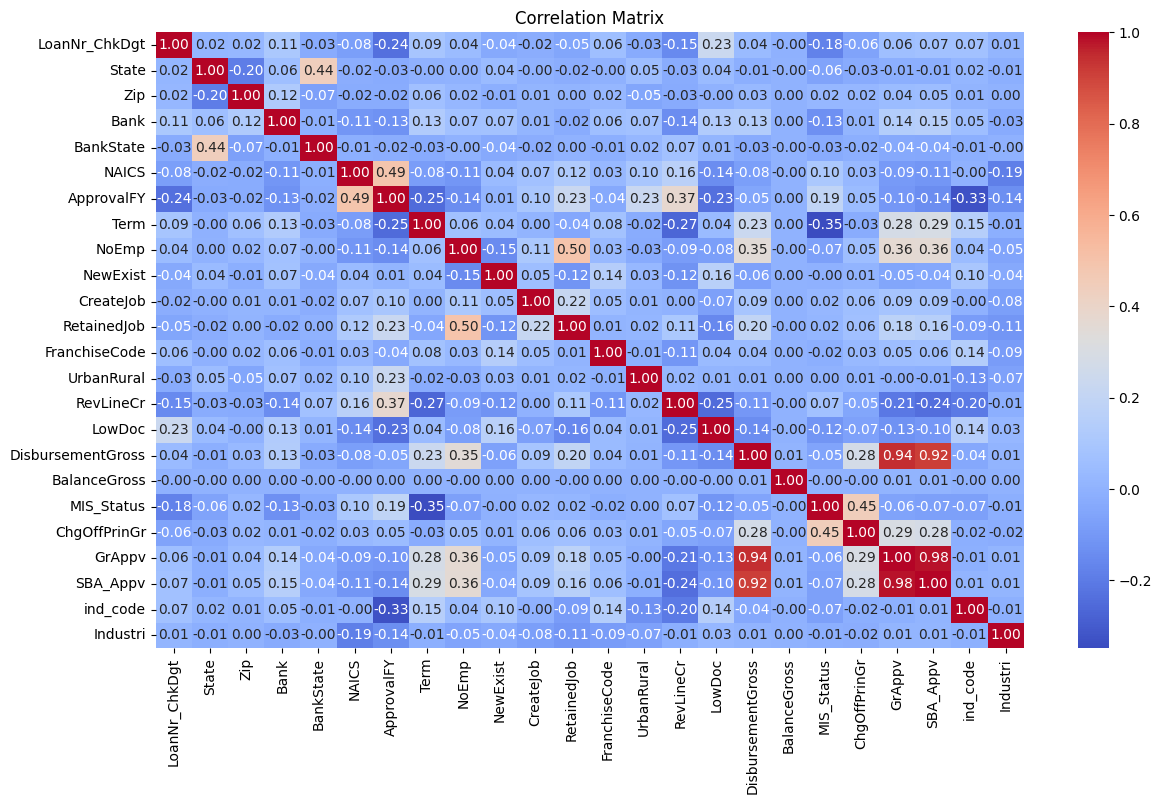

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Berdasarkan heatmap correlation diatas, berikut adalah fitur yang kami putuskan untuk pertahankan beserta dengan penjelasannya

1. ``Term`` : Merupakan jumlah angsuran yang diberikan kepada peminjam (dalam bentuk bulan)
2. ``NoEmp`` : Jumlah karyawan yang terdapat pada UMKM peminjam
3. ``CreateJob`` : Jumlah pekerjaan yang tercipta dari UMKM tersebut
4. ``RetainedJob`` : Jumlah pekerjaan yang berhasil dipertahankan dari UMKM tersebut
5. ``NewExist`` : Mengklasifikasi apakah UMKM tersebut termasuk baru atau lama
6. ``UrbanRural`` : Letak dari UMKM tersebut apakah berada pada pedesaan / perkotaan
7. ``NAICS / Industri`` : Kode klasifikasi Industri yang ditetapkan oleh Amerika Utara
8. ``FranchiseCode`` : Apakah UMKM atau usaha tersebut termasuk franchise atau tidak
9. ``LowDoc`` : Apakah pinjaman yang diajukan tersebut support low doc
10. ``RevLineCr`` : Status Jalur kredit bergulir, Y = ya / N = tidak
11. ``MIS_Status`` : Kolom target yang menyatakan lunas atau gagal bayar
12. ``Bank`` : Nama bank yang mengeluarkan pinjaman
13. ``State`` : Negara bagian peminjam
14. ``BankState`` : Negara bagian bank yang mengeluarkan pinjaman

### Adapun beberapa fitur yang kami putuskan untuk hilangkan beserta dengan penjelasannya

1. ``ApprovalDate`` : Tidak cocok dijadikan prediktor karena kita akan memprediksi sebelum pinjaman tersebut di approve
2. ``DisbursementDate`` : Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
3. ``ChgOffDate`` : Karena terlalu banyak missing value
4. ``Zip`` : Memiliki kardinalitas yang tinggi
5. ``City`` : Memiliki kardinalitas yang tinggi
6. ``LoanNr_ChkDgt``: Primary key
7. ``Name`` : Nama seseorang tidak bisa dijadikan prediktor, selain itu memiliki kardinalitas yang tinggi juga
8. ``SBA_Appv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
9. ``GrAppv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
10. ``ChgOffPrinGr`` : Mirip seperti kolom target, sehingga akan menimbulkan data leaking jika dijadikan feature
11. ``DisbursementGross``: Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
12. ``BalanceGross`` : Tidak cocok untuk menjadi prediktor
13. ``ApprovalFY`` : Tidak cocok untuk menjadi prediktor

## B. Feature Extraction

Feature yang ditambah:
1. ``BankIsIn`` -> Jika BankState = State, maka 1, jika tidak 0
2. ``CompanyType`` -> Jika NewExist dan UrbanRural = 1, maka 1. Jika NewExist = 1 tapi UrbanRural = 2, maka 2. Jika NewExist = 2 tapi UrbanRural = 1, maka 3. Jika NewExist dan UrbanRural = 2, maka 4.
3. ``Prod`` -> Jika CreatedJob > RetainedJob maka 1, jika tidak 0
4. ``Membuat kolom baru Recession`` = tahun terjadinya resesi di USA, yaitu Desember 2007 hingga Juni 2009

### 1. Membuat fitur tambahan BankIsIn

In [ ]:
df['BankIsIn'] = df.apply(lambda row: 1 if row['BankState'] == row['State'] else 0, axis=1)
print("\n Data setelah membuat fitur BankIsIn:")
print(df['BankIsIn'].value_counts())


 Data setelah membuat fitur BankIsIn:
BankIsIn
0    717971
1      9984
Name: count, dtype: int64


### 2. Membuat fitur tambahan CompanyType

In [ ]:
df['CompanyType'] = df.apply(lambda row: 1 if row['NewExist'] == 1 and row['UrbanRural'] == 1 else (2 if row['NewExist'] == 1 else (3 if row['UrbanRural'] == 1 else 4)), axis=1)
print("\nData setelah membuat fitur CompanyType:")
print(df['CompanyType'].value_counts())


Data setelah membuat fitur CompanyType:
CompanyType
1    449066
3    189260
2     59281
4     30348
Name: count, dtype: int64


### 3. Membuat fitur tambahan Prod

In [ ]:
df['Prod'] = df.apply(lambda row: 1 if row['CreateJob'] > row['RetainedJob'] else 0, axis=1)
print("\nData setelah membuat fitur Prod:")
print(df['Prod'].value_counts())


Data setelah membuat fitur Prod:
Prod
1    481238
0    246717
Name: count, dtype: int64


### 4. Membuat fitur tambahan Recession

In [ ]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df['Recession'] = df['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)
print(df['Recession'].value_counts())

Recession
0    622013
1    105942
Name: count, dtype: int64


### Fitur Akhir yang akan digunakan

In [ ]:
columns_to_drop = ['ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'Zip', 'City', 'LoanNr_ChkDgt', 'Name', 'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross', 'ApprovalFY']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("\n Data setelah feature selection:")
print(df.info())


 Data setelah feature selection:
<class 'pandas.core.frame.DataFrame'>
Index: 727955 entries, 0 to 899163
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State          727955 non-null  int32  
 1   Bank           727955 non-null  int32  
 2   BankState      727955 non-null  int32  
 3   NAICS          727955 non-null  int64  
 4   Term           727955 non-null  int64  
 5   NoEmp          727955 non-null  float64
 6   NewExist       727955 non-null  int32  
 7   CreateJob      727955 non-null  float64
 8   RetainedJob    727955 non-null  float64
 9   FranchiseCode  727955 non-null  int64  
 10  UrbanRural     727955 non-null  int32  
 11  RevLineCr      727955 non-null  int64  
 12  LowDoc         727955 non-null  int64  
 13  MIS_Status     727955 non-null  int32  
 14  ind_code       727955 non-null  int64  
 15  Industri       727955 non-null  int32  
 16  BankIsIn       727955 non-null  int64  
 17  

# **Stage 2 EDA dan Visualization**

## A. Univariate Analysis

In [ ]:
cats1 = ['NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'Industri',
       'BankIsIn', 'CompanyType', 'Prod', 'Recession']
cats2 = ['Bank','State', 'BankState']
nums = ['Term','NoEmp','CreateJob','RetainedJob', 'MIS_Status']

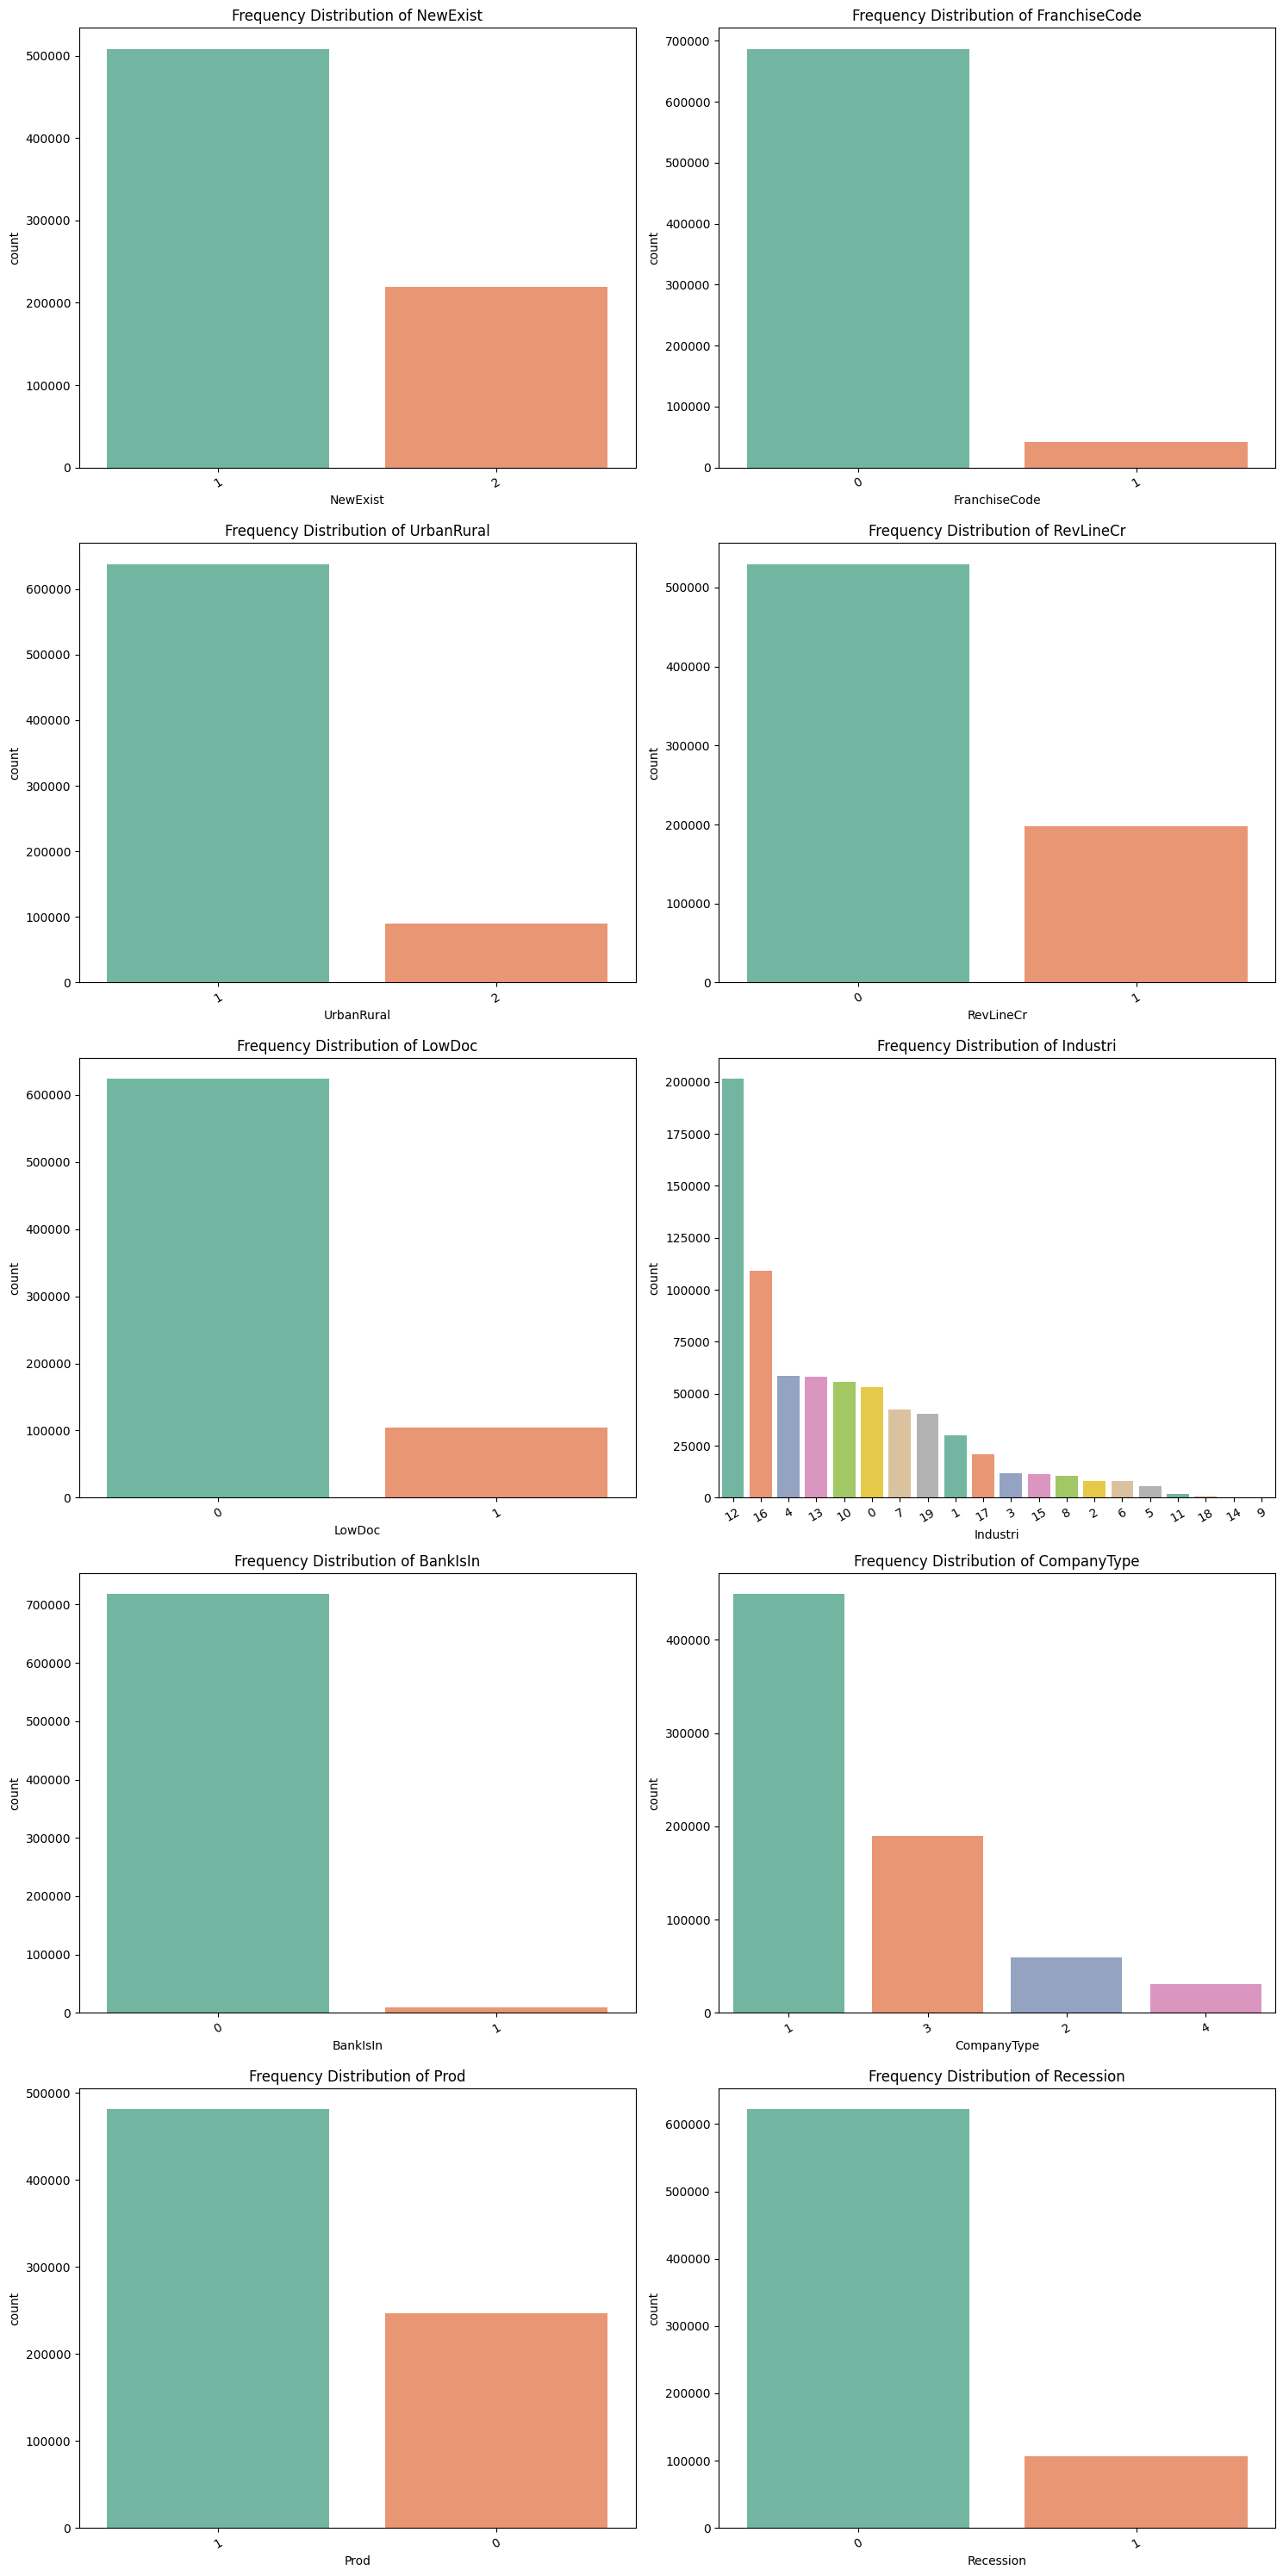

In [ ]:
# subplots
fig, axes = plt.subplots(5,2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats1, axes)):
    order = df[column].value_counts().index
    sns.countplot(x=column, data=df, palette='Set2', ax=ax, order=order)
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Remove empty subplots
for i in range(len(cats1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**NewExist**
> Jumlah bisnis yang menerima pinjaman dalam dataset didominasi oleh bisnis yang sudah existing (label 1) dibandingkan dengan bisnis baru (label 2)

> Kemungkinan penjelasan untuk hal ini adalah: bisnis yang sudah ada memiliki rekam jejak yang lebih panjang dan stabil, sehingga lebih mudah untuk mendapatkan pinjaman.

**FranchiseCode**
> Sebagian besar bisnis yang menerima pinjaman adalah bisnis independen atau bukan bagian dari franchise

> Ini bisa mencerminkan kenyataan bahwa bisnis independen mungkin lebih membutuhkan dukungan finansial dibandingkan dengan bisnis yang merupakan bagian dari sistem franchise

**UrbanRural**
> Data menunjukkan bahwa sebagian besar pinjaman diberikan kepada bisnis di daerah perkotaan. Ini mungkin disebabkan oleh beberapa faktor:

>> Konsentrasi bisnis yang lebih tinggi di daerah perkotaan.</br>
Akses yang lebih mudah ke layanan perbankan dan keuangan di daerah perkotaan.</br>
Potensi pasar yang lebih besar di daerah perkotaan.

> Meskipun jumlahnya lebih sedikit, ada sejumlah signifikan pinjaman yang diberikan di daerah pedesaan. Ini menunjukkan bahwa ada kebutuhan akan dukungan finansial di daerah pedesaan, meskipun aksesnya mungkin lebih terbatas dibandingkan dengan daerah perkotaan.

**RevLineCr**
> Data menunjukkan bahwa sebagian besar pinjaman diberikan tanpa revolving line of credit. Ini mungkin disebabkan oleh beberapa faktor:
> Bisnis mungkin lebih memilih pinjaman konvensional dengan struktur pembayaran tetap daripada revolving line of credit yang lebih fleksibel namun mungkin lebih kompleks.
> Kebijakan pemberian pinjaman dari lembaga keuangan yang mungkin lebih ketat untuk revolving line of credit.

**LowDoc**
> Grafik menunjukkan bahwa sebagian besar pinjaman diberikan tanpa menggunakan program LowDoc. Namun, ada juga kebutuhan signifikan akan jenis pinjaman ini, meskipun dalam jumlah yang lebih kecil.

**Industri**
> Frekuensi distribusi industri tertinggi di bidang Other Services karena banyak yang nilai awalnya 0 dimasukkan ke kategori ini. Nilai awal 0 menandakan perusahaan tidak diberikan label NAICS, yaitu tipikal pinjaman sebelum NAICS berdiri tahun 1997.

> Setelah itu, 3 sektor teratas adalah Retail, Manufacturing dan Accomodation & Food Services, mencerminkan pentingnya ketiga industri ini dalam perekonomian.

> Selanjutnya, sektor construction, healthcare dan social assistance juga menunjukan aktivitas yang signifikan dalam memperoleh pinjaman.

> Sektor lainnya: Wholesale Trade, Administrative Support, Transportation & Warehousing, dan sektor lainnya menunjukkan aktivitas yang lebih rendah tetapi tetap signifikan.

**BankIsIn**
> Jumlah pinjaman, dimana bisnisnya berada pada state yang sama dengan Bank pemberi pinjamnannya terlihat tidak berbeda signifikan.

**CompanyType**
> Jumlah bisnis yang sudah ada dan berada di perkotaan paling tinggi, diikuti oleh bisnis baru dan ada di perkotaan. Sisanya adalah bisnis yang ada di pedesaan, baik yang sudah ada maupun baru.

**Prod**
> Sebagian besar data menunjukkan bahwa jumlah pekerjaan yang diciptakan (CreateJob) lebih besar daripada pekerjaan yang dipertahankan (RetainedJob). Ini bisa mengindikasikan bahwa banyak bisnis yang menerima pinjaman berhasil menciptakan lebih banyak lapangan pekerjaan baru daripada mempertahankan pekerjaan yang ada.

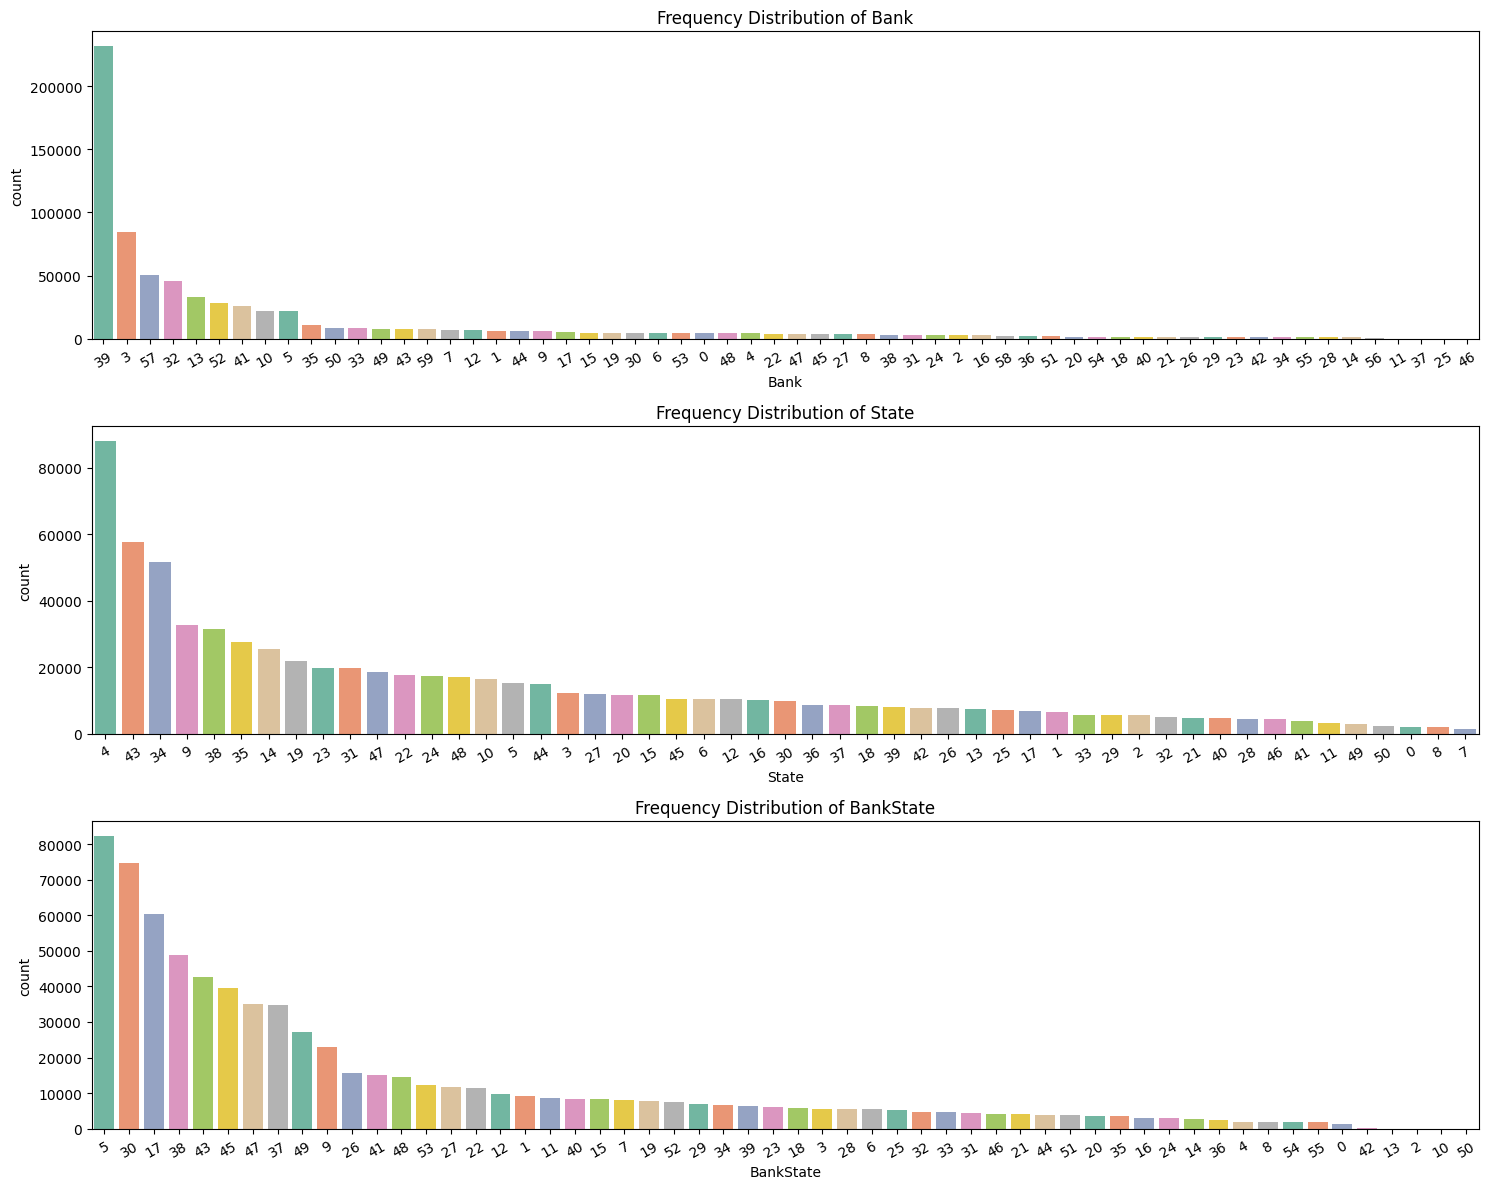

In [ ]:
# subplots
fig, axes = plt.subplots(3,1, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats2, axes)):
    order = df[column].value_counts().index
    sns.countplot(x=column, data=df, palette='Set2', ax=ax, order=order)
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Remove empty subplots
for i in range(len(cats2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Bank**
> Kategori di kolom ini yang paling banyak kuantitasnya adalah Others. Ini karena bank yang hanya muncul < 1500 dimasukkan ke dalam kategori ini dan bank dengan karakteristik seperti ini ternyata banyak. Bank yang paling dipakai untuk meminjam ke SBA adalah Bank of America, Wells Fargo, JP Morgan, US Bank National of Association, dan Citizens Bank National Association.

**State**
> Dari total 50 state di USA, peminjam paling banyak ada pada state California, Texas, New York, Florida, dan Philadelphia. Untuk fokus implementasi program improvement kepada customer, SBA bisa fokus kepada customer di 5 state ini.i.

BankState**
> Dari total 50 state di USA, bank peminjam paling banyak ada pada state California, North Carolina, Illinois, Ohio, dan Rhode Island. Untuk fokus implementasi program improvement kepada bank, SBA bisa fokus kepada bank ke 5 state inia.

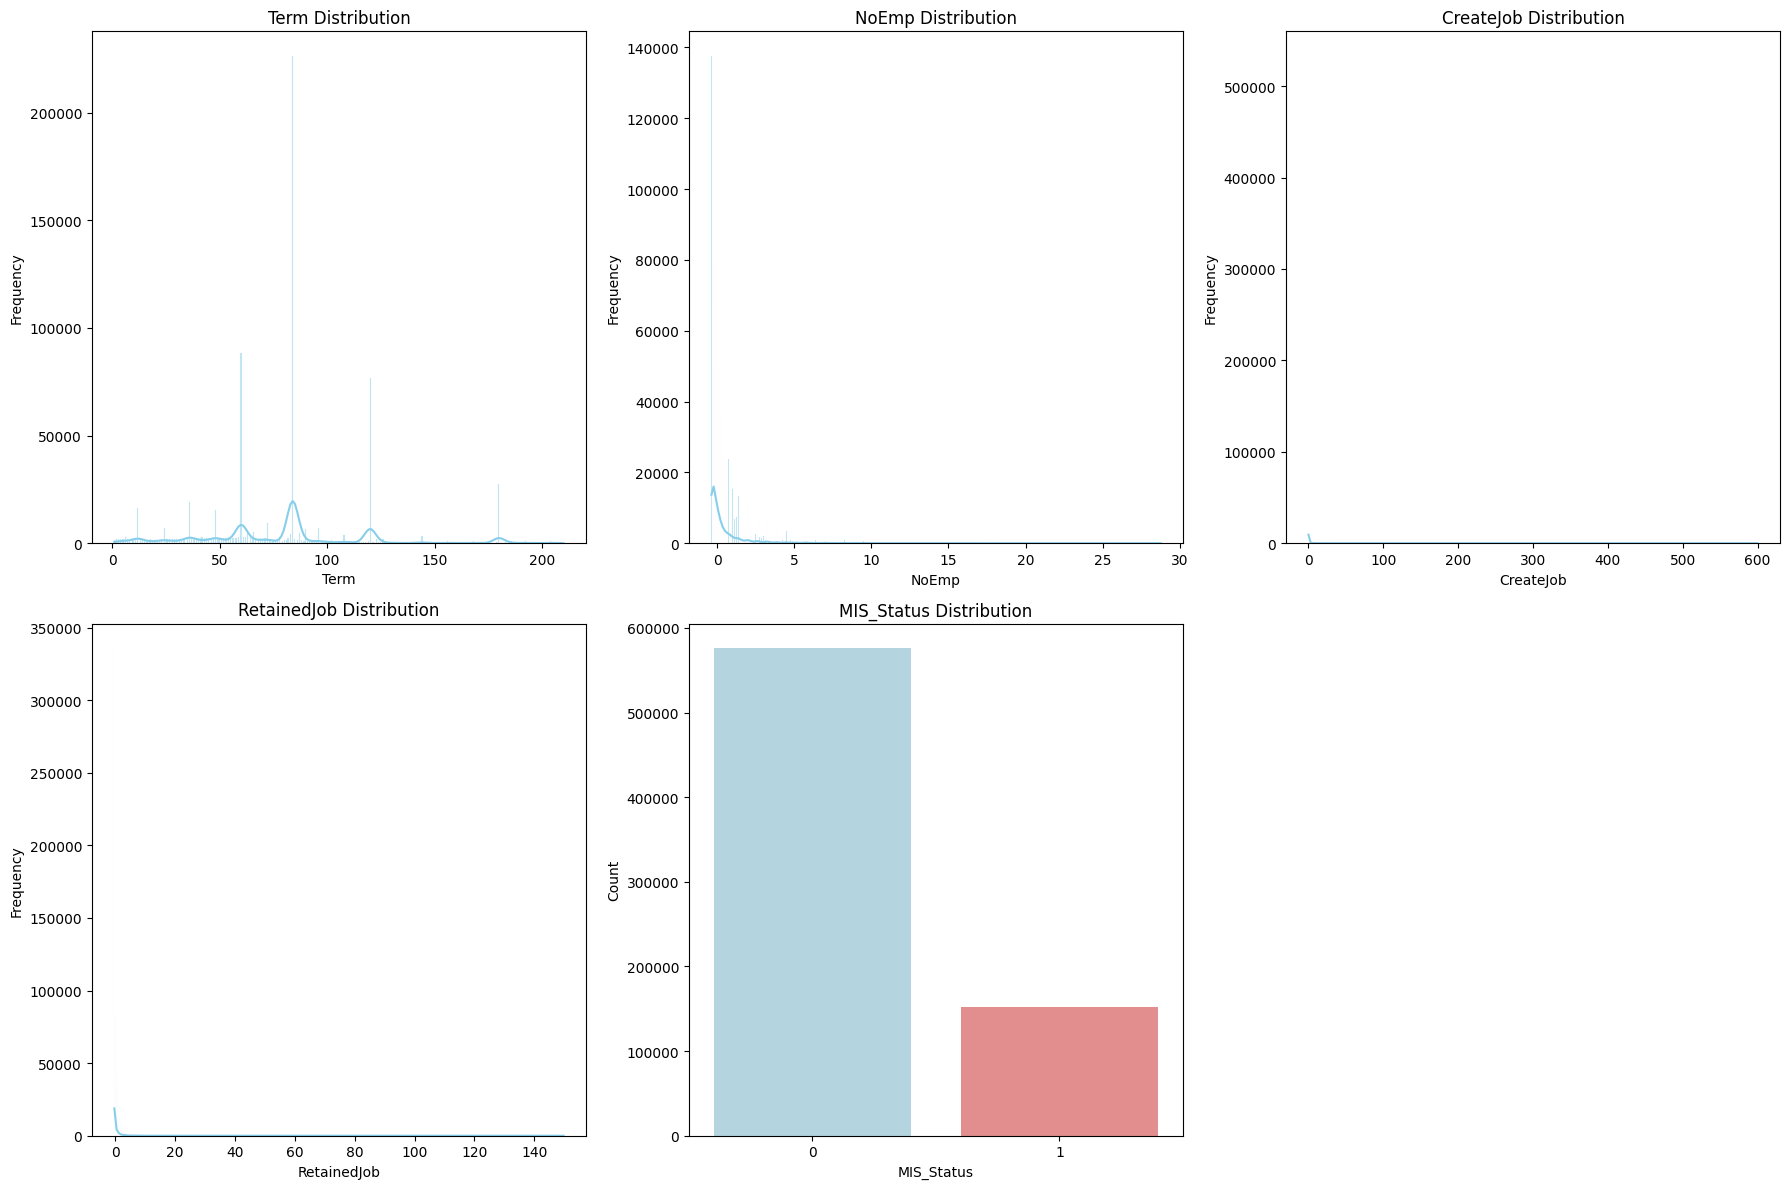

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each numerical column
for i, column in enumerate(nums):
    # For target variable (countplot)
    if column == 'MIS_Status':
        sns.countplot(data=df, x=column, palette=['lightblue', 'lightcoral'], ax=axes[i])
        axes[i].set_title(f'{column} Distribution')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
    else:
        # For other numerical columns, use distplot or histplot
        sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=axes[i])
        axes[i].set_title(f'{column} Distribution')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(nums), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Term**
> Setelah di-handle outlier dengan metode IQR, limit atas Term berubah menjadi kurang dari 240. Ini tercermin di kolom RealEstate yang menandakan bahwa tidak ada Term di atas 240. Untuk distribusi dari Term sendiri bisa dilihat menyerupai distribusi normal.

**NoEmp**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 29. Perusahaan peminjam memiliki karyawan yang

**CreateJob**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 600.

**RetainedJob**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 150.

**MIS_Status**
> Setelah dilakukan class imbalance, persentase rasio CHGOFF dan PIF tidak berubah, yakni masing-masing masih sekitar 18% dan 72% dari total dataset.

## B. Multivariate Analysis

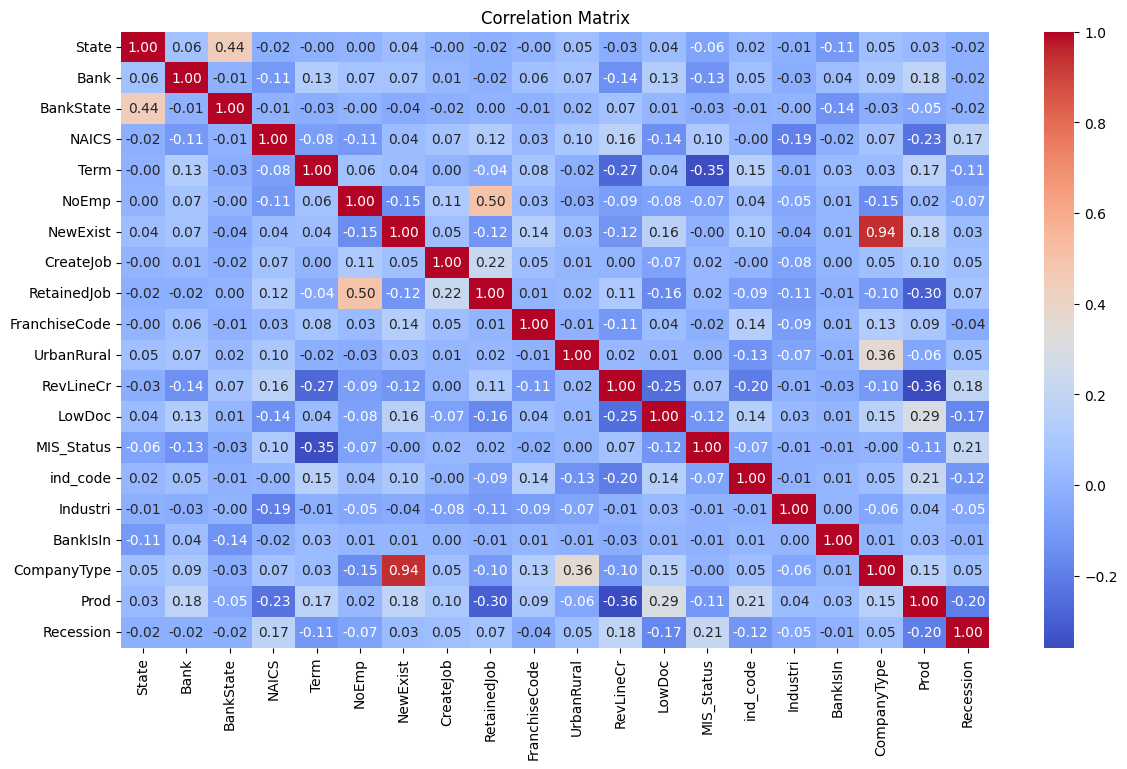

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

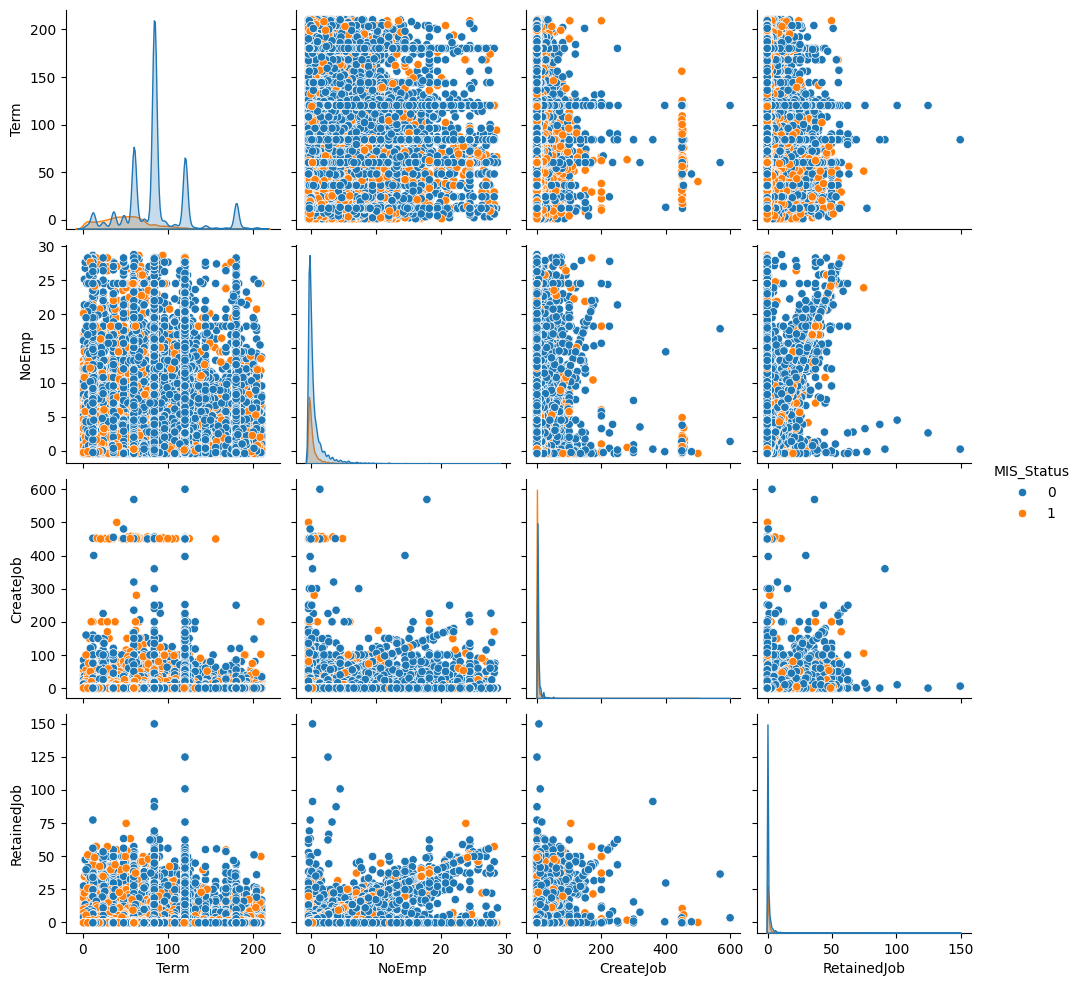

In [ ]:
sns.pairplot(df[nums], hue='MIS_Status', diag_kind='kde')
plt.show()

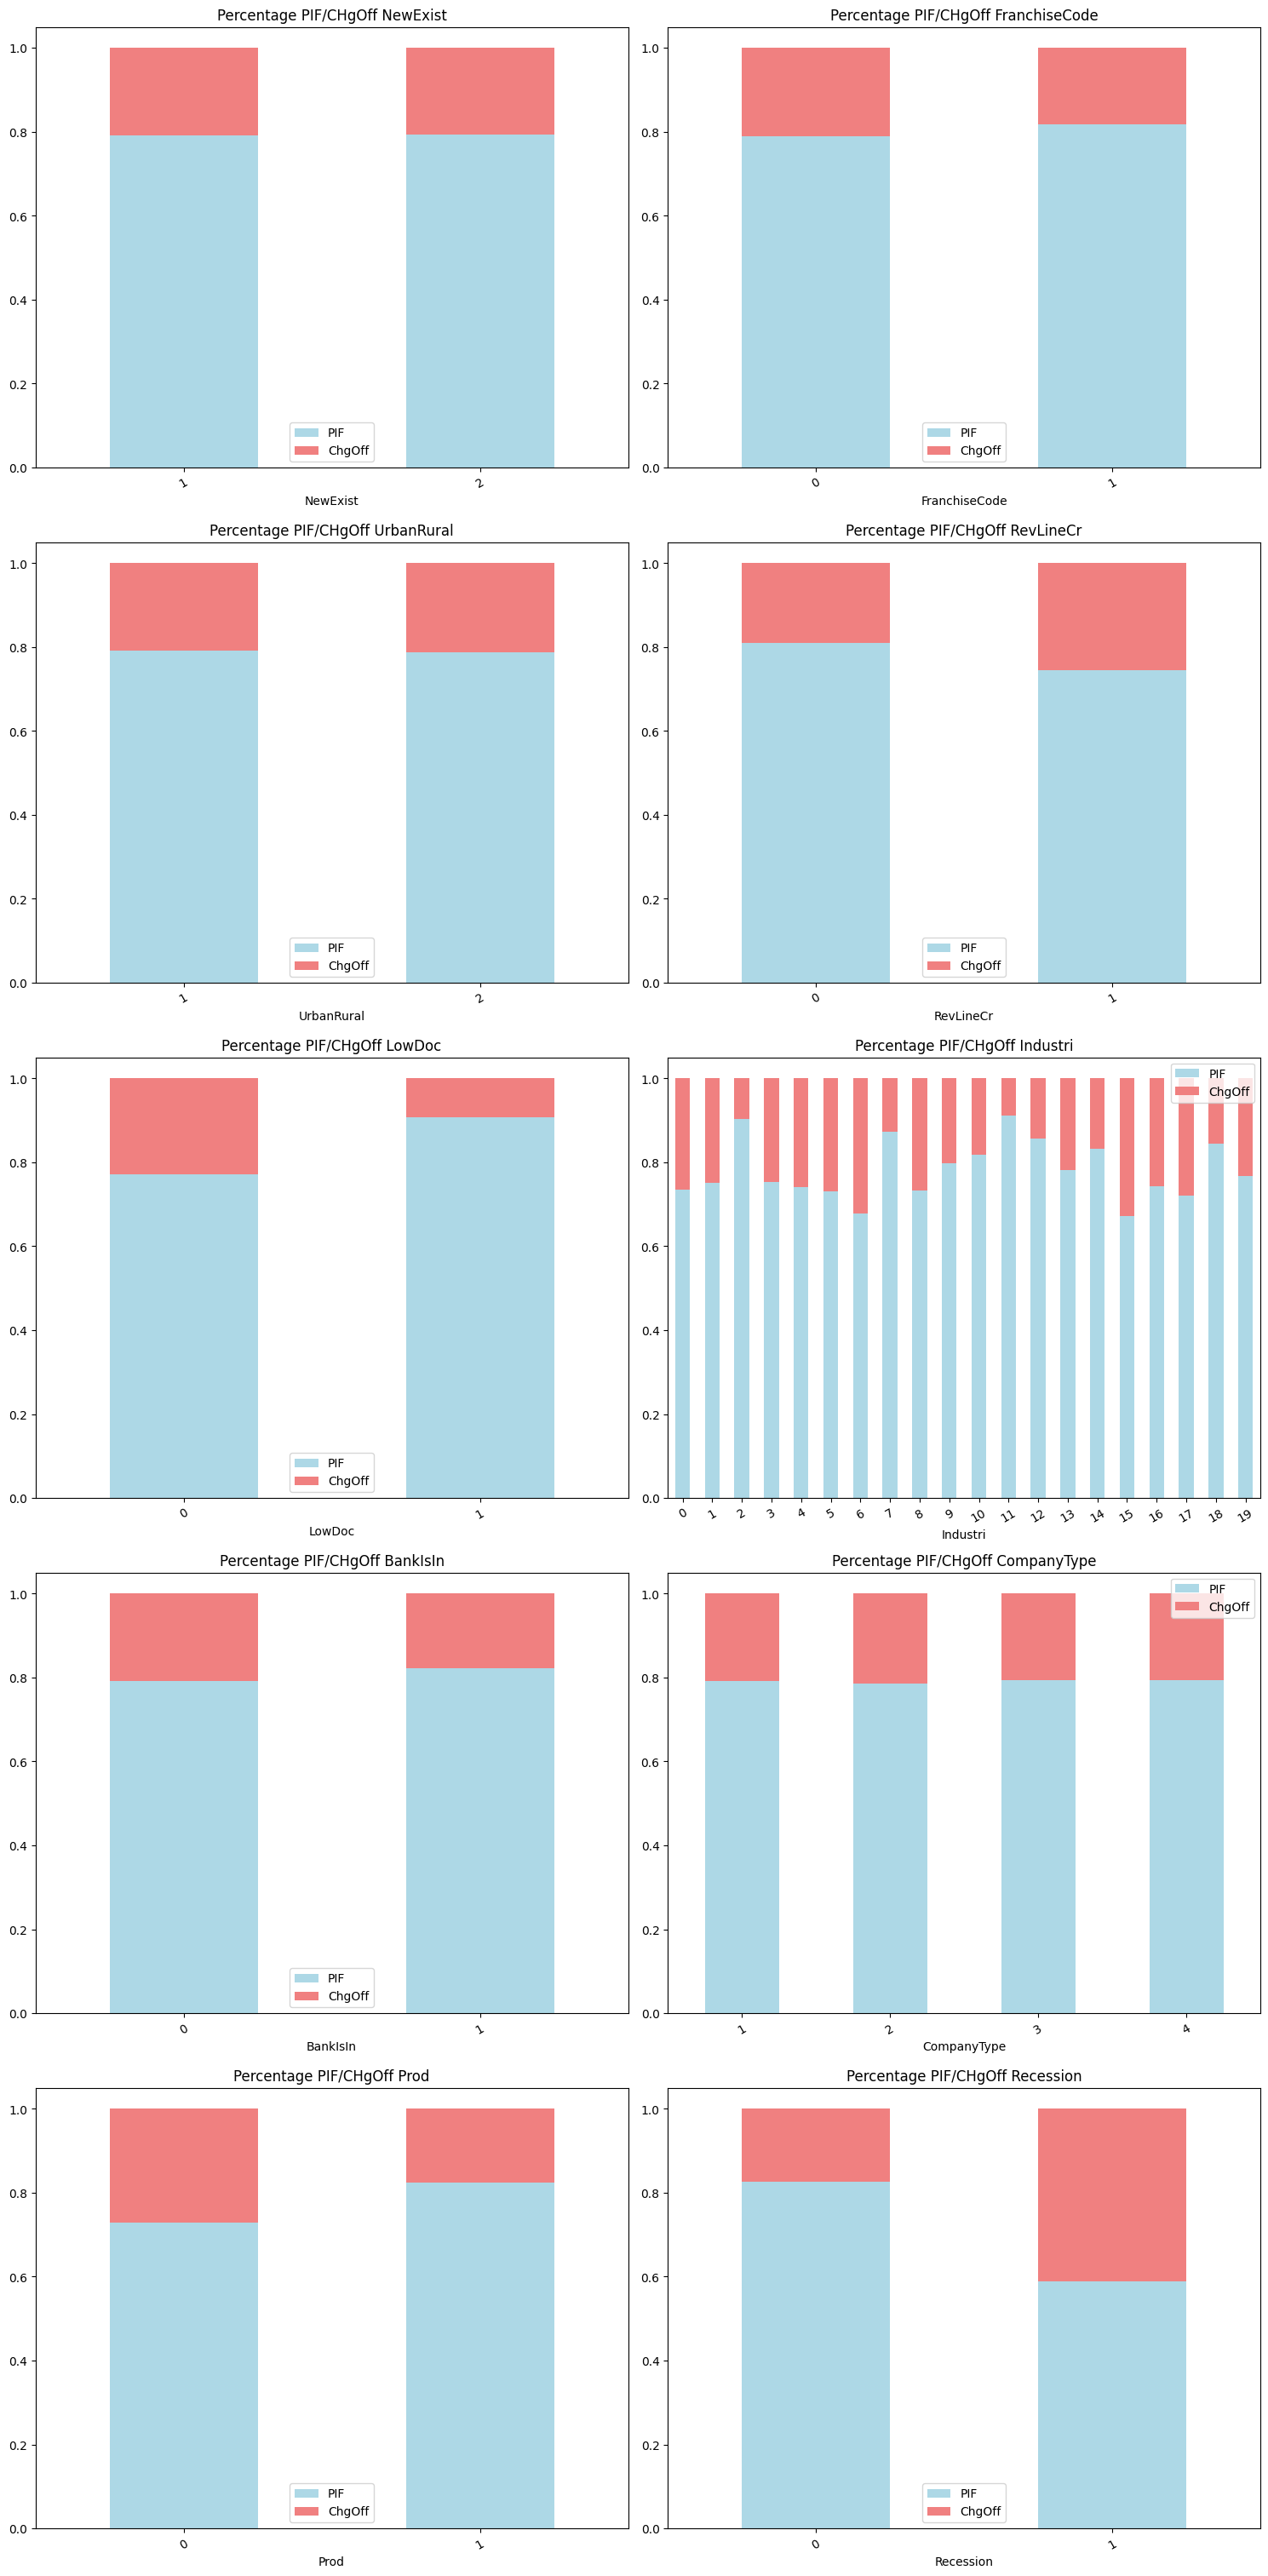

In [ ]:
# subplots
fig, axes = plt.subplots(7, 2, figsize=(15, 42))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(cats1):
    # Create a subplot for each categorical variable
    ax = axes[i]

    # Group by the current column and calculate normalized value counts
    count_data = df.groupby(col)['MIS_Status'].value_counts(normalize=True).unstack('MIS_Status')
    count_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=ax)

    # Set title and legend
    ax.set_title(f'Percentage PIF/CHgOff {col}')
    ax.legend(labels=('PIF', 'ChgOff'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Remove empty subplots
for i in range(len(cats1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

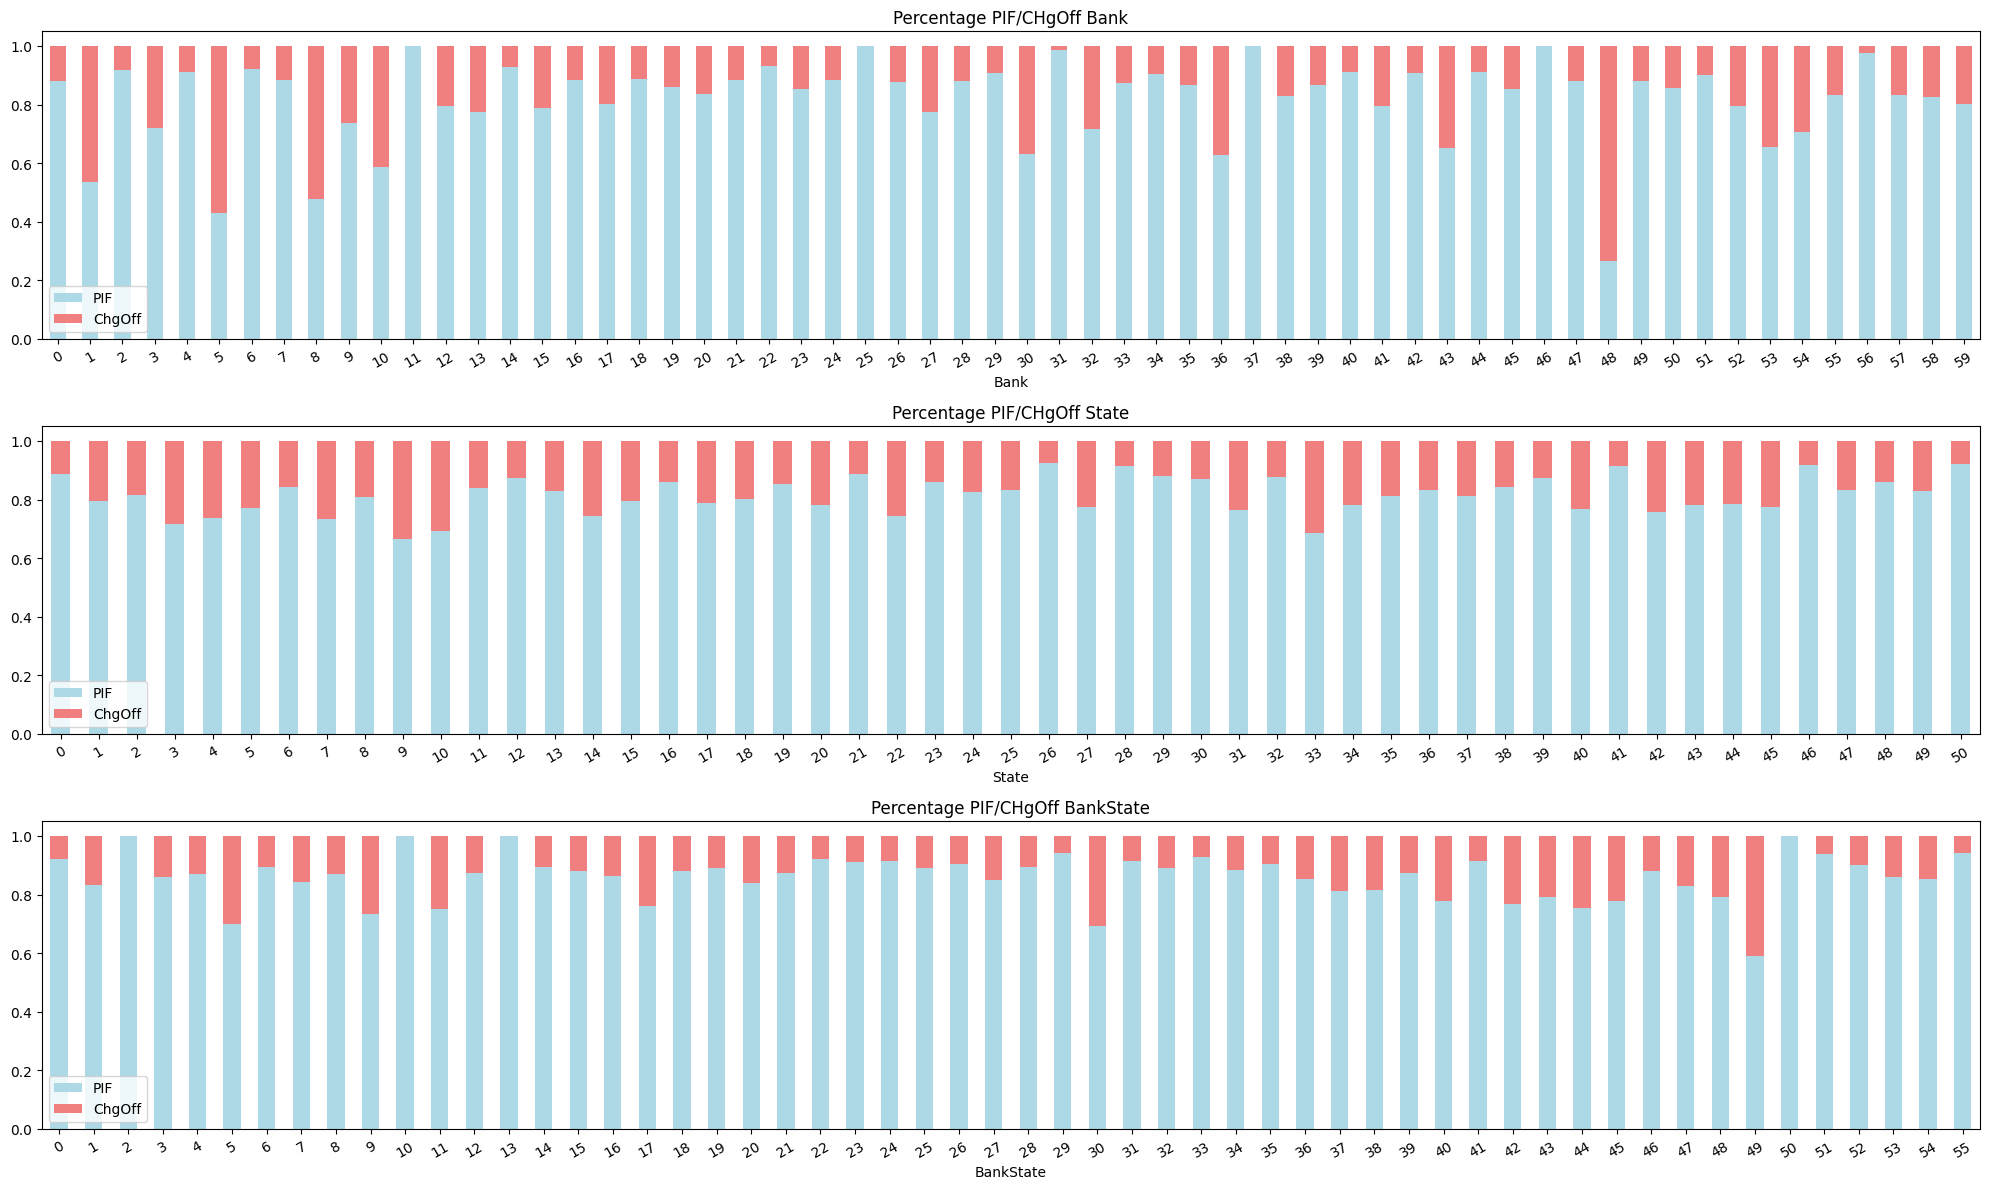

In [ ]:
# subplots
fig, axes = plt.subplots(3, 1, figsize=(20,12))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(cats2):
    # Create a subplot for each categorical variable
    ax = axes[i]

    # Group by the current column and calculate normalized value counts
    count_data = df.groupby(col)['MIS_Status'].value_counts(normalize=True).unstack('MIS_Status')
    count_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=ax)

    # Set title and legend
    ax.set_title(f'Percentage PIF/CHgOff {col}')
    ax.legend(labels=('PIF', 'ChgOff'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Remove empty subplots
for i in range(len(cats2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()